In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import fisher_exact
import seaborn as sns
plt.rcParams['figure.figsize'] = 12, 7

In [4]:
pop = pd.read_csv('data/catalog.csv')
samp = pd.read_csv('data/clean_reception.csv')
len(pop)

322

In [5]:
pop_auths = pop.groupby('Author').size()
samp_auths = samp.groupby('Author').size()
pop_prints = pop.groupby('Printer').size()
samp_prints = samp.groupby('Printer').size()
pop_place = pop.groupby('Place of Publication').size()
samp_place = samp.groupby('Place of Publication').size()

In [6]:
auths = pd.concat([samp_auths, pop_auths], axis=1, keys=["obsv", "exp"]).fillna(0)
top_auths = auths[auths.exp > 4]
bot_auths = auths[auths.exp < 5]
top_auths.ix["other"] = [sum(bot_auths.obsv.values), sum(bot_auths.exp.values)]
top_auths.exp = top_auths.exp.apply(lambda x: x / sum(top_auths.exp.values))
top_auths.obsv = top_auths.obsv.apply(lambda x: x / sum(top_auths.obsv.values))
top_auths, len(auths)
totals = auths.exp["Lope de Vega"] + auths.exp["Ledesma, Alonso de"] + auths.exp["Cervantes, Miguel"] + auths.exp["Aleman, Mateo"]
totals / 322.0, auths.exp["Lope de Vega Carpio, Fenix"]

(0.63664596273291929, 100)

In [11]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

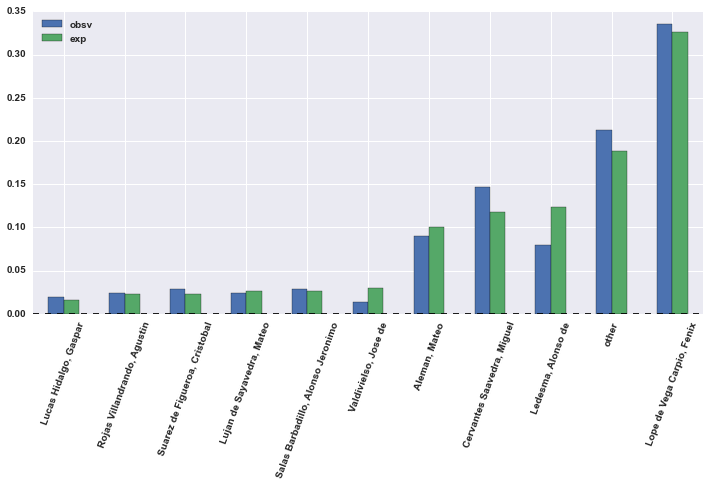

In [19]:
sns.set_style("dark")
auths = top_auths.sort(columns="exp")
auths.plot(kind="bar")
plt.gcf().subplots_adjust(bottom=0.30)
plt.xticks(rotation='70')
plt.savefig("img/article/figure8_1.eps", format='eps', dpi=1000)

In [20]:
chisquare(auths.obsv.values, auths.exp.values)

(0.036957990990821817, 0.99999999998231826)

In [21]:
prints = pd.concat([samp_prints, pop_prints], axis=1, keys=["obsv", "exp"]).fillna(0)
top_prints = prints[prints.exp > 4]
bot_prints = prints[prints.exp < 5]

In [22]:
top_prints.ix["other"] = [sum(bot_prints.obsv.values), sum(bot_prints.exp.values)]
top_prints.exp = top_prints.exp.apply(lambda x: x / sum(top_prints.exp.values))
top_prints.obsv = top_prints.obsv.apply(lambda x: x / sum(top_prints.obsv.values))
top_prints

,obsv,exp
Assiayn,0.023810,0.020761
Cormellas,0.109524,0.117647
Crasbeeck,0.042857,0.038062
Cuesta,0.104762,0.086505
ImprentaReal,0.014286,0.034602
Madrigal,0.019048,0.020761
Manescal,0.033333,0.044983
Martin,0.100000,0.083045
Mey,0.019048,0.038062
Rodriguez,0.038095,0.031142


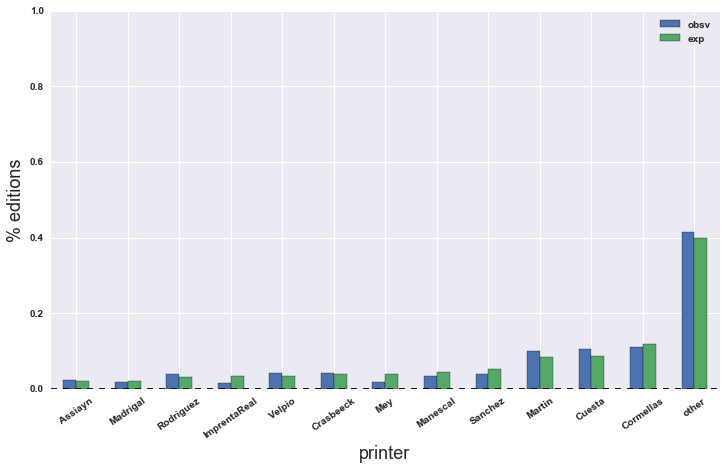

In [40]:
prints = top_prints.sort(columns="exp")
prints.plot(kind="bar")
plt.ylabel('% editions', size=18)
plt.xlabel('printer', size=18)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xticks(rotation='35')
plt.ylim(0, 1)
plt.savefig("img/article/figure9.eps", format='eps', dpi=1000)

In [24]:
chisquare(prints.obsv.values, prints.exp.values)

(0.041381279724033361, 0.99999999999989297)

In [23]:
place = pd.concat([samp_place, pop_place], axis=1, keys=["obsv", "exp"]).fillna(0)
top_place = place[place.exp > 4]
bot_place = place[place.exp < 5]
# totals = place.exp["Madrid"] + place.exp["Barcelona"] + place.exp["Lisboa"] + place.exp["Bruselas"] + place.exp["Valencia"] 
# totals / 322

0.6428571428571429

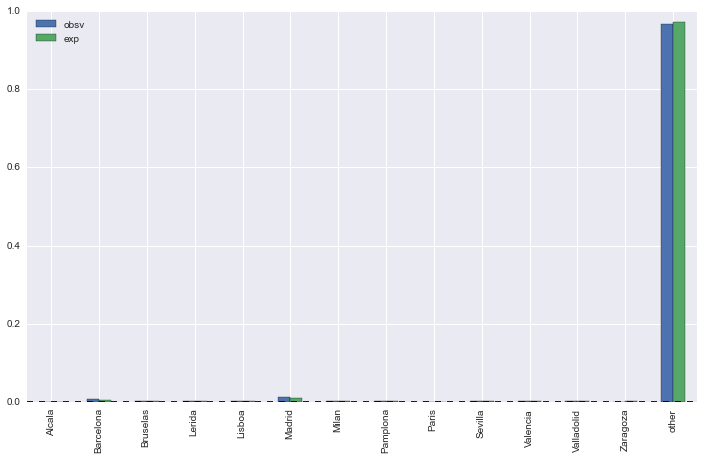

In [26]:
# top_place.ix["other"] = [sum(bot_place.obsv.values), sum(bot_place.exp.values)]
# top_place.exp = top_place.exp.apply(lambda x: x / sum(top_place.exp.values))
# top_place.obsv = top_place.obsv.apply(lambda x: x / sum(top_place.obsv.values))
top_place.plot(kind="bar")

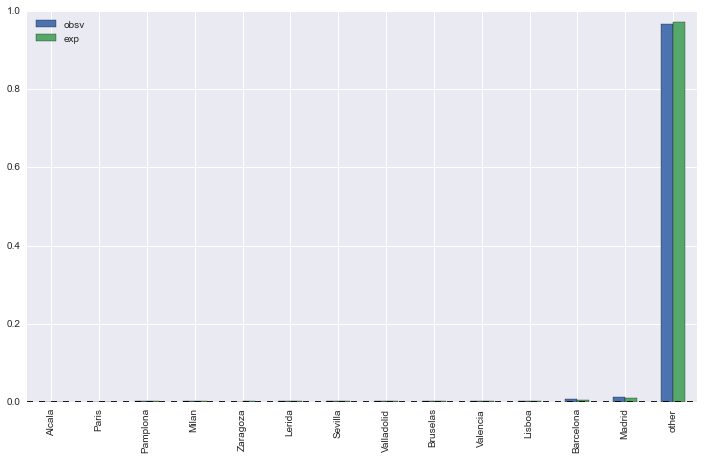

In [27]:
place = top_place.sort(columns="exp")
place.plot(kind="bar")
plt.savefig("img/top_cities.png")

In [ ]:
chisquare(place.obsv.values, place.exp.values)

In [20]:
chisquare([100, 200], [200, 400])

(150.0, 1.7336432457178413e-34)